## Flight Price Prediction
The pice of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time etc. Airline organizations may diminish the cost at the time they need to build the market and at the time when the tickets are less accessible. They may maximize the costs. The price may rely upon different factors. Each factor has its own proprietary rules and algorithms to set the price accordingly. Recent advances in Artificial Intelligence(AI) and Machine Learning(ML) makes it possible to infer such rules and models the price variation.

In [1]:
# Importing all Requires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
import os

In [2]:
pd.set_option('display.max_columns', None)  # For more go here: https://pandas.pydata.org/docs/user_guide/options.html
# pd.set_options.display.max_rows

In [3]:
import os
# for dirname, _, filename in os.getcwd('Flight_data/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [4]:
# read the Dataset
flight_df = pd.read_csv('Flight_data/Clean_Dataset.csv')
flight_df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
# Dropping the useless column 'Unnamed: 0'
flight_df = flight_df.drop('Unnamed: 0', axis=1)

In [6]:
flight_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
# A Quick information about the data
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
# statistical Description of Data just we have three numerical columns
flight_df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
#The corr() method finds the correlation of each column in a DataFrame.
flight_df.describe().corr().T

,duration,days_left,price
duration,1.0000,1.000000,0.923300
days_left,1.0000,1.000000,0.923292
price,0.9233,0.923292,1.000000


In [10]:
# Size of the data
flight_df.shape

(300153, 11)

In [11]:
df1 = flight_df.groupby(['flight', 'airline'], as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

### Indigo becaming as a most popular Airline

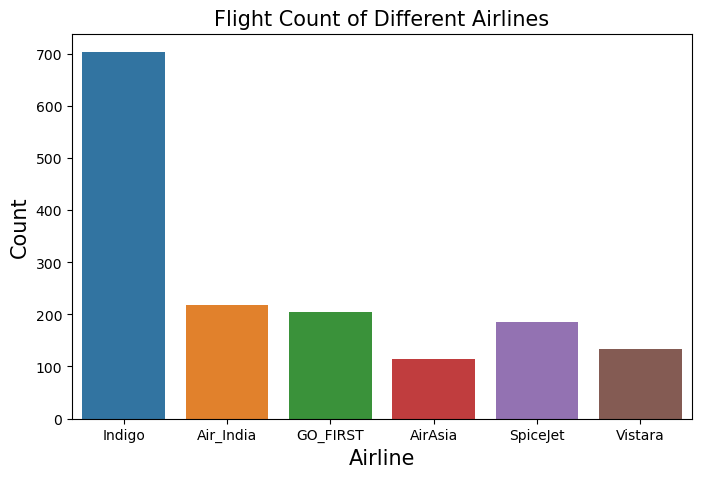

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(df1, x="airline")
plt.title('Flight Count of Different Airlines', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [13]:
df2 = flight_df.groupby(['flight','airline', 'class'], as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

### Most of the airline has Economic Class as commom

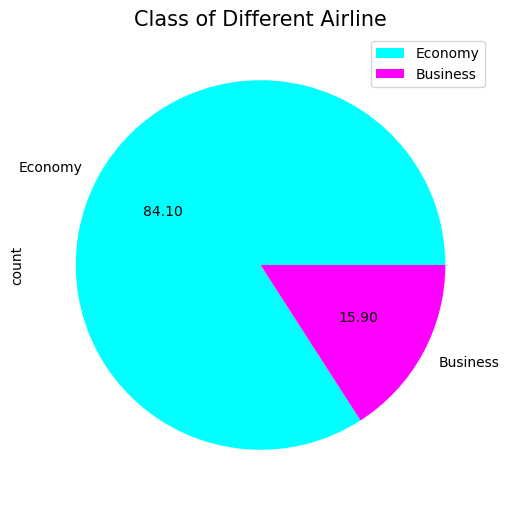

In [14]:
plt.figure(figsize=(8, 6))
df2['class'].value_counts().plot(kind='pie', 
                                 textprops={'color':'black'}, 
                                 autopct='%.2f', cmap='cool')
plt.title('Class of Different Airline', fontsize=15)
plt.legend(['Economy', 'Business'])
plt.show()


## Does price vary with Airlines?
* As we can see Vistara has maximum price range
* Vistara and Air_india Airlines have maximum price when compared to others
* SpiceJet, AirAsia, GO_first and indigo has some what equal prices

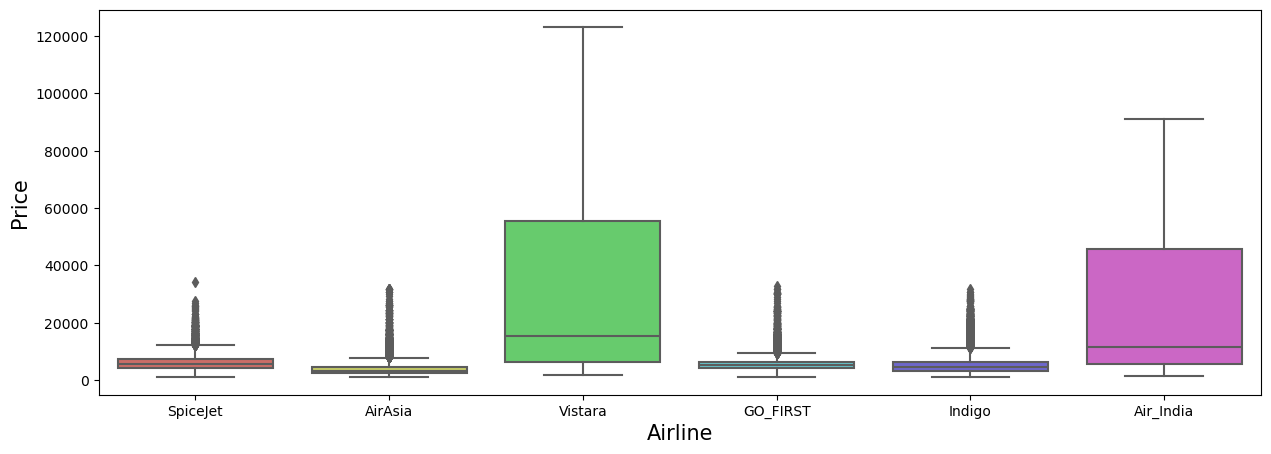

In [15]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=flight_df['airline'], y=flight_df['price'], palette='hls')
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

How Does the Ticket Price vary between Economy and Business Class?

* Ticket Price is Maximum for Bussiness Class When compared to Economy Class

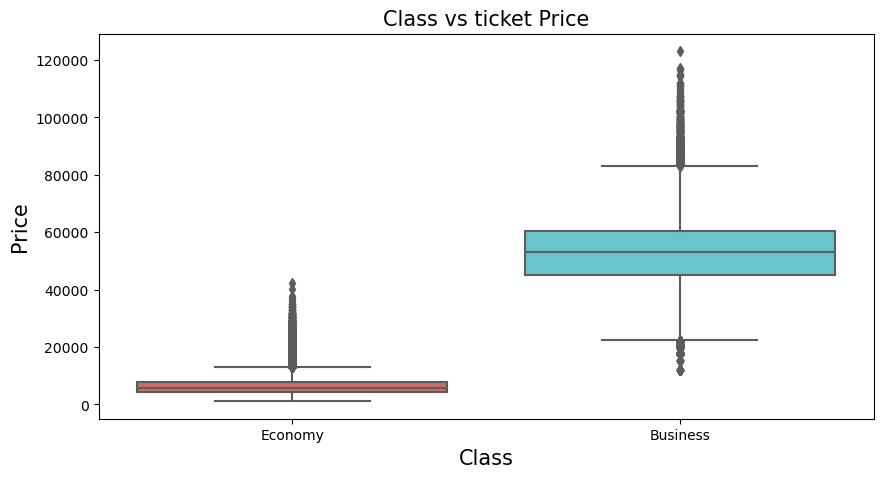

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='class', y='price', data=flight_df, palette='hls')
plt.title('Class vs ticket Price', fontsize=15)
plt.xlabel('Class', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

### How the Ticket Price change based on the Departure Time and Arrival Time?
1. Departure Time Vs Ticket Price

    * Ticket Price is More for the Flights when the Departure Time is at Night
    * Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening
    * Ticket Price is Low for the Flights Having Departure Time at Late_night
     
2. Arrival Time Vs Ticket Price
   
    * Ticket Price is More for the Flights when the Arrival Time is at Evening
    * Ticket Price is almost equal for flights Having Arrival time is at Morning and Night
    * Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

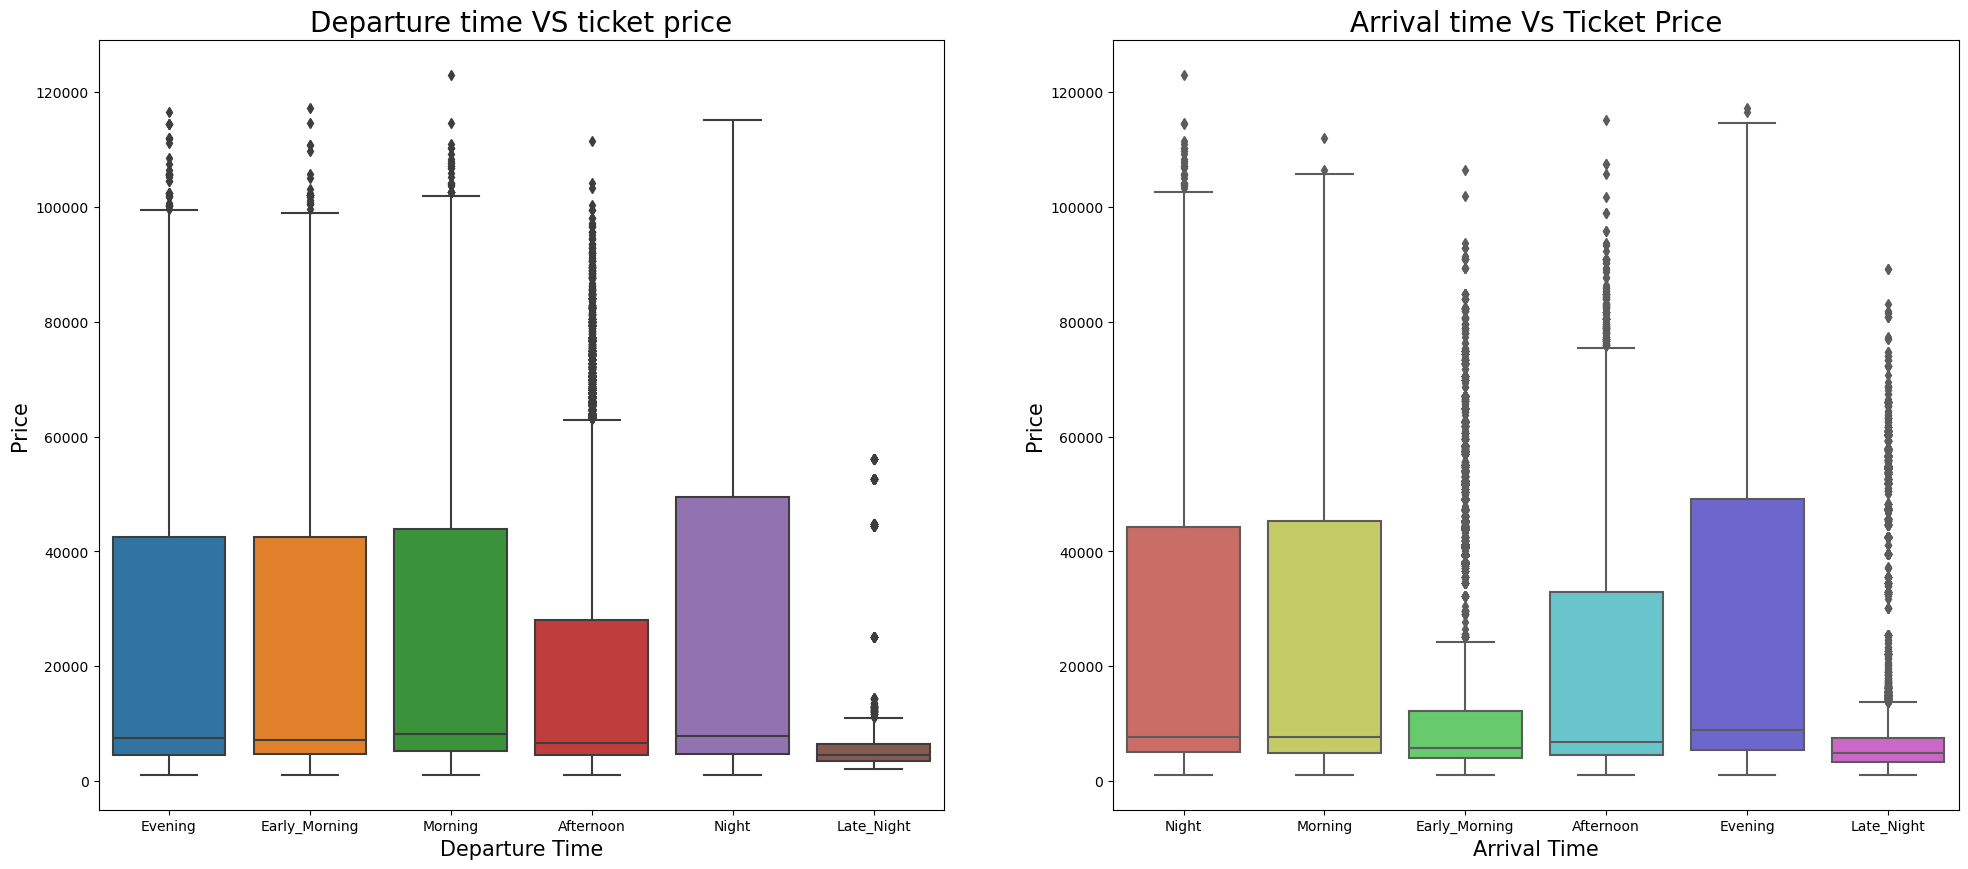

In [17]:
plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='departure_time', y='price', data=flight_df)
plt.title('Departure time VS ticket price', fontsize=20)
plt.xlabel('Departure Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.subplot(1, 2, 2)
sns.boxplot(x='arrival_time', y='price', data=flight_df, palette='hls')
plt.title('Arrival time Vs Ticket Price', fontsize=20)
plt.xlabel('Arrival Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()



Average Price of different Airlines from Source city to Destination city

In [18]:
flight_df.groupby(['airline', 'source_city', 'destination_city'], as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [19]:
# Creating a backup file
flight_bk = flight_df.copy()

In [20]:
# Converting the labels into a numeric from using label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in flight_df.columns:
    if flight_df[col].dtype == 'object':
        flight_df[col]=le.fit_transform(flight_df[col])

In [21]:
# Storing the dependent variables in X and Independent variable in y
X = flight_df.drop('price', axis=1)
y = flight_df['price']

In [22]:
# Splitting the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [23]:
# Scaling the values to convert the int values to Machine Learning
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1))
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [24]:
a = {
    'Model Name':[],
    'Mean_Absolute_Error_MAE':[],
    'Adj_R_Square':[],
    'Root_Mean_Squared_Error_RMSE':[],
    'Mean_Absolute_Precentage_Error_MAPE':[],
    'Mean_Squared_Error_MSE':[],
    'Root_Mean_Squared_Log_Error_RMSLE':[],
    'R2_score':[]
}
results=pd.DataFrame(a)
results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Precentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [25]:
# Build the Regression / Regressor models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
# Create objects of regression / regressor model with default hyper-parameters
model_lr = LinearRegression()
model_dcr = DecisionTreeRegressor()
model_bag = BaggingRegressor()
model_RFC = RandomForestRegressor()
model_SVR = SVR()
model_KNN = KNeighborsRegressor(n_neighbors=5)
model_ETR = ExtraTreesRegressor()
model_RE = Ridge()
model_LO = linear_model.Lasso(alpha=0.1)

model_GBR = GradientBoostingRegressor(loss='ls',
                                      learning_rate=0.1,
                                      n_estimators=100, 
                                      subsample=1.0,  
                                      criterion='friedman_mse',
                                      min_samples_split=2, min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0, max_depth=3,
                                      min_impurity_decrease=0.0, init=None, random_state=None,
                                      max_features=None, alpha=0.9, verbose=0,
                                      max_leaf_nodes=None, warm_start=False, 
                                      validation_fraction=0.1, n_iter_no_change=None, 
                                      tol=0.0001, ccp_alpha=0.0)
                        



In [ ]:
# Evalution matrix for all the algorthms
MODELS = [model_lr, model_dcr, model_bag, model_RFC, model_SVR, model_KNN, model_ETR, model_RE, model_LO, model_GBR]

for model in MODELS:
    # Fit the model with train data
    model.fit(X_train, y_train)

    # Predict the model with test data
    y_pred = model.predict(X_test)
    # Print the model name
    print("Model Name: ", model)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics
    
    print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y_test, y_pred), 3))
    print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y_test, y_pred), 3))
    print('Root Mean Squared Error (RMSE): ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print ('R2_score: ', round(metrics.r2_score(y_test, y_pred), 6))
    print ('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))), 3))

    # DEfine the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R core values
    r_score = round(metrics.r2_score(y_test, y_pred), 6)
    adjusted_r_score = round(1 - (1 - r_score)*(len(y)-1)/(len(y)-X.shape[1]-1), 6)
    print('Adj R Score: ', adjusted_r_score)
    print('------------------------------------------------------------------------------------------------------------------------------------------')

    # -----------------------------------------------------------------------------------------
    new_row = {
        'Model Name' : model,
        'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
        'Adj_R_Score' : adjusted_r_score,
        'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'Mean_Absolute_Percentage_Error_MAPE' : result,
        'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
        'Root_Mean_Squared_Log_Error_RMSLE' : np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
        'R2_score' : metrics.r2_score(y_test, y_pred)
    }

    results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)
    #------------------------------------------------------------------------------------------------  

Model Name:  LinearRegression()
Mean Absolute Error (MAE):  4630.296
Mean Squared Error (MSE):  49070241.265
Root Mean Squared Error (RMSE):  7005.015
R2_score:  0.904656
Root Mean Squared Log Error (RMSLE):  2.181
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Score:  0.904653
------------------------------------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE):  1264.007
Mean Squared Error (MSE):  13891245.471
Root Mean Squared Error (RMSE):  3727.096
R2_score:  0.973009
Root Mean Squared Log Error (RMSLE):  2.107
Mean Absolute Percentage Error (MAPE): 8.64 %
Adj R Score:  0.973008
------------------------------------------------------------------------------------------------------------------------------------------
Model Name:  BaggingRegressor()
Mean Absolute Error (MAE):  1220.651
Mean Squared Error (MSE):  9079757.489
Root Mean Squared Error (RMSE):  3013.26